In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds


In [3]:
# Load Cats vs Dogs dataset
(train_ds, val_ds), ds_info = tfds.load(
    "cats_vs_dogs",
    split=["train[:80%]", "train[80%:]"],   # 80% train, 20% validation
    as_supervised=True,
    with_info=True
)

print("Number of classes:", ds_info.features["label"].num_classes)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.CFW095_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Number of classes: 2


In [4]:
IMG_SIZE = 128
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0   # normalize
    return image, label

train_ds = train_ds.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


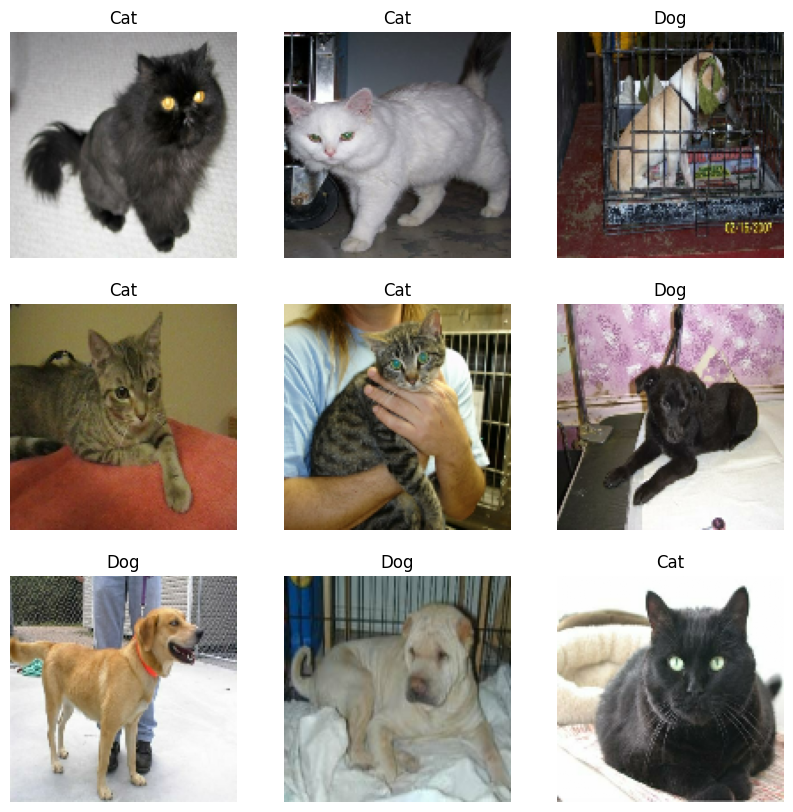

In [5]:
class_names = ["Cat", "Dog"]

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")
plt.show()


In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")   # binary classification
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_ds, validation_data=val_ds, epochs=5)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.6085 - loss: 0.6429 - val_accuracy: 0.7620 - val_loss: 0.4966
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.7666 - loss: 0.4830 - val_accuracy: 0.7988 - val_loss: 0.4430
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - accuracy: 0.8190 - loss: 0.3978 - val_accuracy: 0.8173 - val_loss: 0.4024
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.8662 - loss: 0.3146 - val_accuracy: 0.8207 - val_loss: 0.4005
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 27s 45ms/step - accuracy: 0.9072 - loss: 0.2244 - val_accuracy: 0.8338 - val_loss: 0.4332


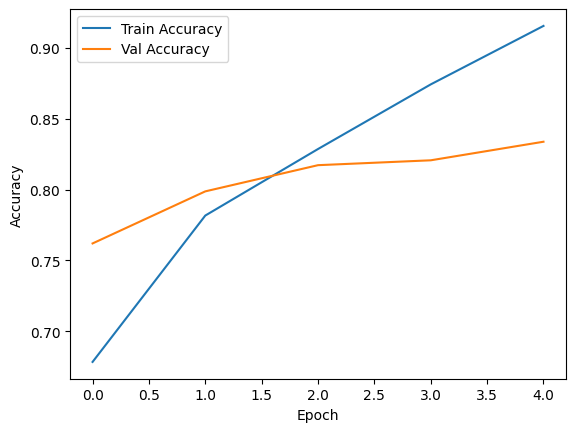

In [8]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [14]:
from google.colab import files
uploaded = files.upload()


Saving cat.jpg to cat.jpg


In [15]:
img_path = "cat.jpg"  # replace with your uploaded filename


In [16]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
print("Predicted:", "Dog" if pred[0][0] > 0.5 else "Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step
Predicted: Cat
